In [75]:
import pandas as pd
import numpy 
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from PIL import ImageDraw
import time 
import datetime
from datetime import datetime

In [96]:

neighbours=3
def imageLoad(filename):
#     image = Image.open("Images/test_arange_96.png", "r")
    image = Image.open(filename, "r")
    plt.imshow(image)
    plt.show()
    image=image.transpose(method=Image.FLIP_LEFT_RIGHT)
    width, height = image.size
#     print(height)
    pixel_values = list(image.getdata())
#     print(image.mode)
    if image.mode == "RGB":
        channels = 3
    elif image.mode == "L":
        channels = 1
    elif image.mode == "RGBA":
        channels = 4
    else:
        print("Unknown mode: %s" % image.mode)
    final_values = numpy.array(pixel_values).reshape((width, height, channels))
#     print(final_values.shape)
    return final_values,height,width


In [97]:
# https://stackoverflow.com/questions/58688630/how-to-find-lat-long-coordinates-in-a-image-if-we-have-lat-long-of-4-corners
def GetLatandLong(top_Left_Lat, top_Left_Long, bottom_Right_Lat, bottom_Right_Long,img_Width,img_Height, target_Top, target_Left):
    diff_Between_Top_Bottom_Lat = bottom_Right_Lat - top_Left_Lat
    percentage_Of_Total_Lat_In_Picture = diff_Between_Top_Bottom_Lat/90*100
    image_Size_Height_Required_To_Cover_Entire_Earth = img_Height/percentage_Of_Total_Lat_In_Picture*100
    top_Left_Percentage_Of_Lat = top_Left_Lat/90*100
    top_Left_Pixel_In_Image = image_Size_Height_Required_To_Cover_Entire_Earth*top_Left_Percentage_Of_Lat/100
    target_Pixel_In_Whole_Earth_Image = top_Left_Pixel_In_Image + target_Top
    percentage_Of_Target_In_Image = target_Pixel_In_Whole_Earth_Image/image_Size_Height_Required_To_Cover_Entire_Earth*100
    target_Lat = percentage_Of_Target_In_Image*90/100


    diff_Between_Top_Bottom_Long = bottom_Right_Long - top_Left_Long
    percentage_Of_Total_Long_In_Picture = diff_Between_Top_Bottom_Long/180*100
    image_Size_Width_Required_To_Cover_Entire_Earth = img_Width/percentage_Of_Total_Long_In_Picture*100
    top_Left_Percentage_Of_Long = top_Left_Long/180*100
    top_Left_Pixel_In_Image = image_Size_Width_Required_To_Cover_Entire_Earth*top_Left_Percentage_Of_Long/100
    target_Pixel_In_Whole_Earth_Image = top_Left_Pixel_In_Image + target_Left
    percentage_Of_Target_In_Image = target_Pixel_In_Whole_Earth_Image/image_Size_Width_Required_To_Cover_Entire_Earth*100    
    target_Long = percentage_Of_Target_In_Image*180/100

    return target_Lat,target_Long


# target_Lat,target_Long = GetLatandLong(-8.62, 41.160, -8.64, 41.145,128,128, 124, 124)

# print(target_Lat,target_Long)

In [98]:
def get_coordinates(final_values,height,width):
    lat=[]
    long=[]
    for row in range(height):
        for col in range(width):
            if(final_values[row][col][0]>254):
                flag=False
    #             print(str(row)+"  "+str(col))
                for i in range(4):
                    if(final_values[row][col+(i+1)][0]>240 and final_values[row][col-(i+1)][0]>240):
                        flag=True
                    else:
                        flag=False
                if(flag==True):
                    target_Lat,target_Long = GetLatandLong(-8.62, 41.160, -8.64, 41.1450,height,width, col, row)
                    lat.append(target_Lat)
                    long.append(target_Long)

    #             if(final_values[row][col+1][0]>254 and final_values[row][col+2][0]>254 and final_values[row][col-1][0]>254 and final_values[row][col-2][0]>254):
    #                 target_Lat,target_Long = GetLatandLong(-8.62, 41.1450, -8.64, 41.16,height,width, row, col)
    #                 lat.append(target_Lat)
    #                 long.append(target_Long)
    print(len(lat))
    print(len(long))
    return lat,long
    

In [99]:
# print(tuple(lat_or))
# print(tuple(long_or))
# print(tuple(lat))
# print(tuple(long))
def draw_image(lat,long):
    xlimit_high=-8.62
    xlimit_low=-8.64
    ylimit_high=41.16
    ylimit_low=41.1450
    plt.figure(facecolor=(0, 0, 0))
    plt.rcParams['axes.facecolor'] = 'black'
    plt.xlim(xlimit_low, xlimit_high)
    plt.ylim(ylimit_low, ylimit_high)
    plt.plot(lat,long,color='white', linewidth=1) 
    plt.gcf().set_size_inches(1, 1)
    plt.show()

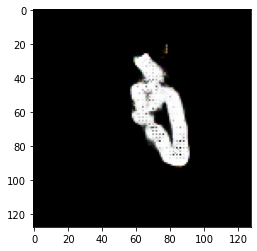

214
214


C:\Users\ar156\AppData\Local\Temp/ipykernel_20516/897175244.py:7: DeprecationWarning: FLIP_LEFT_RIGHT is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.FLIP_LEFT_RIGHT instead.
  image=image.transpose(method=Image.FLIP_LEFT_RIGHT)


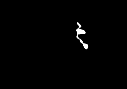

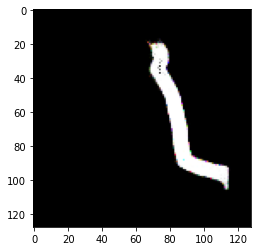

161
161


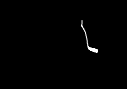

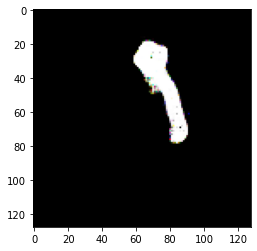

189
189


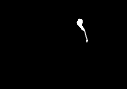

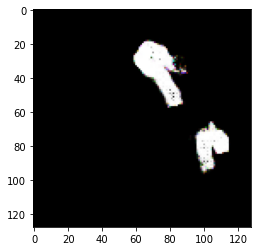

238
238


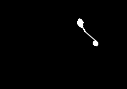

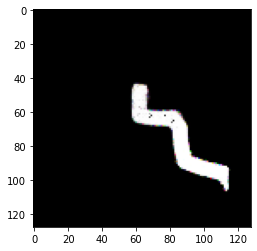

259
259


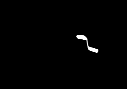

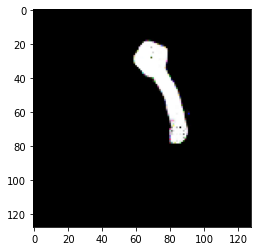

180
180


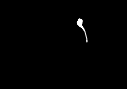

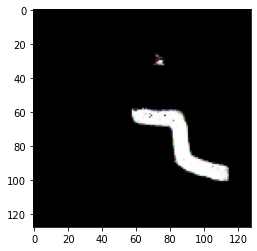

221
221


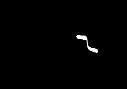

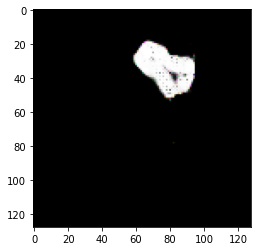

203
203


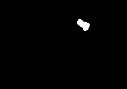

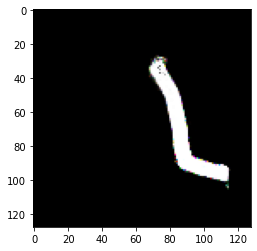

181
181


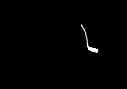

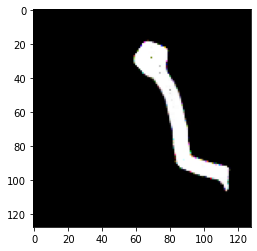

320
320


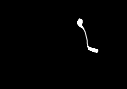

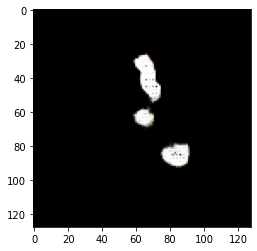

68
68


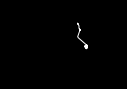

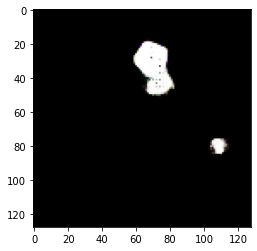

160
160


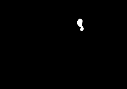

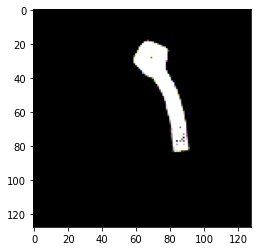

199
199


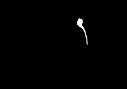

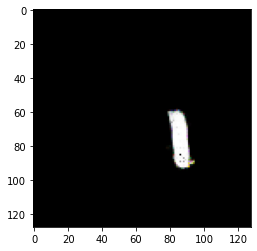

1
1


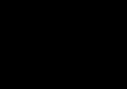

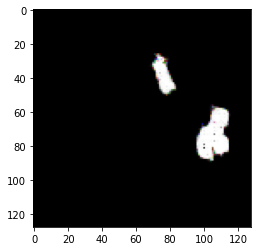

104
104


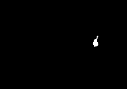

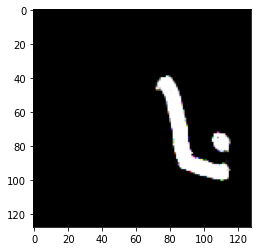

189
189


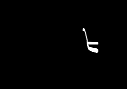

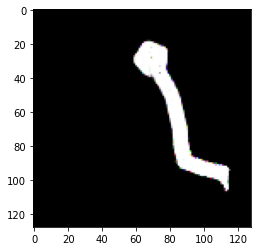

296
296


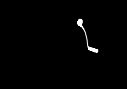

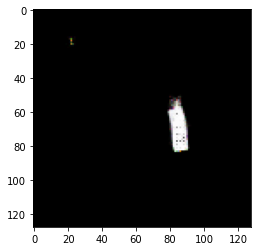

0
0


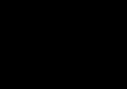

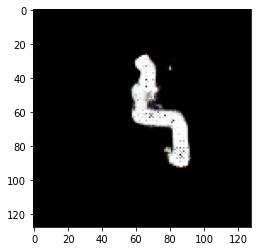

125
125


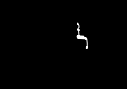

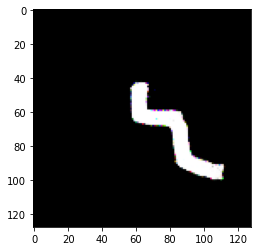

299
299


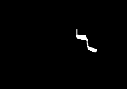

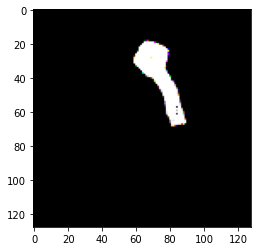

202
202


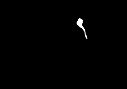

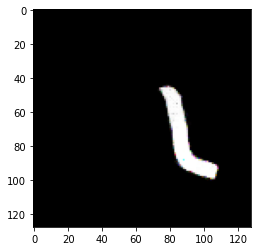

82
82


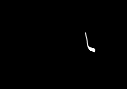

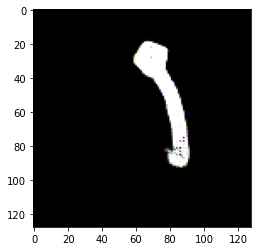

208
208


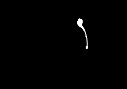

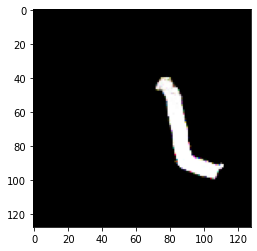

127
127


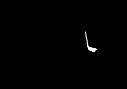

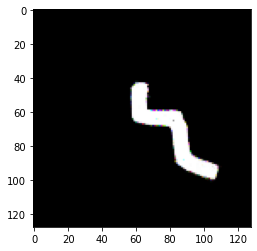

245
245


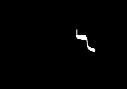

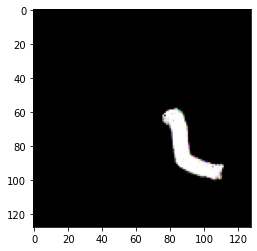

103
103


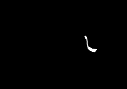

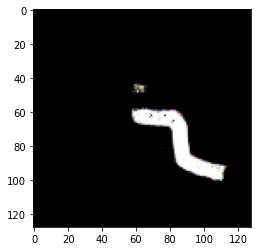

173
173


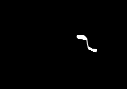

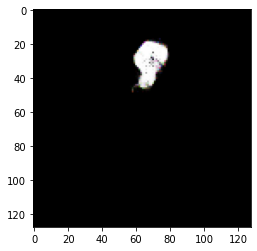

70
70


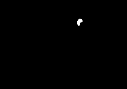

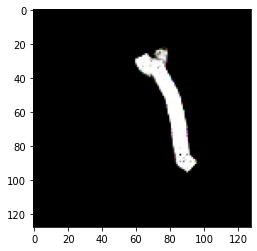

79
79


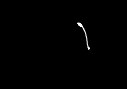

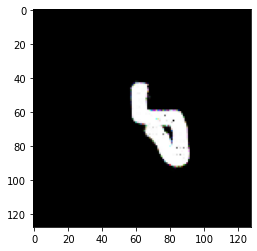

269
269


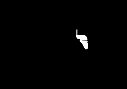

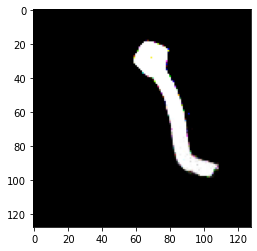

265
265


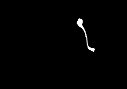

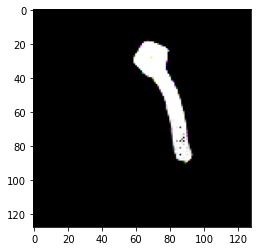

196
196


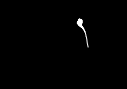

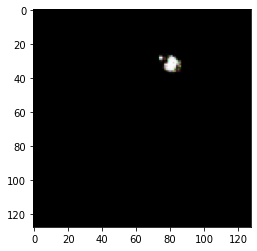

0
0


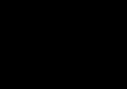

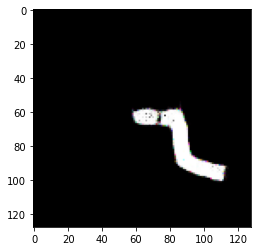

164
164


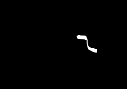

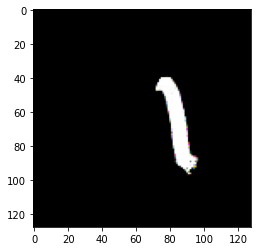

54
54


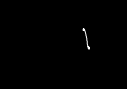

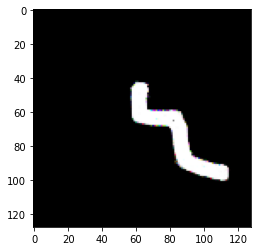

291
291


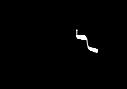

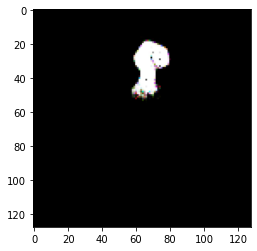

112
112


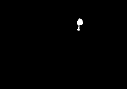

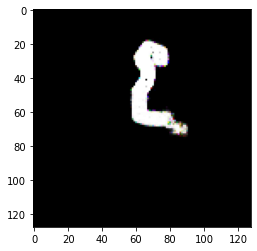

205
205


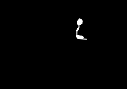

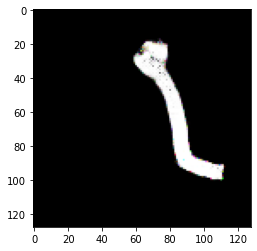

176
176


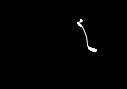

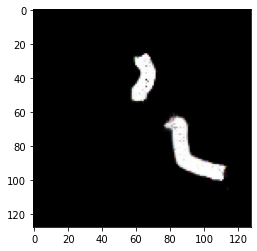

102
102


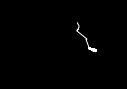

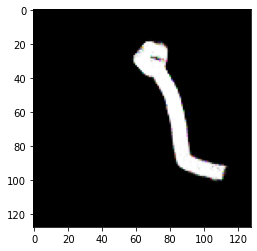

209
209


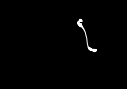

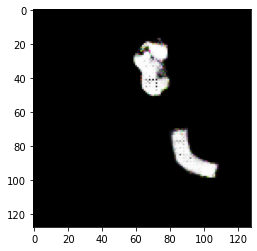

76
76


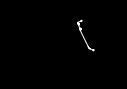

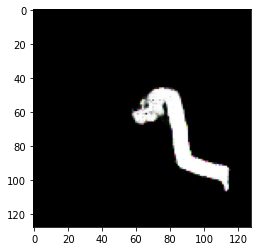

211
211


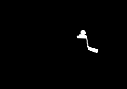

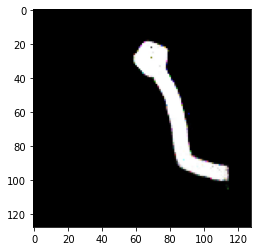

274
274


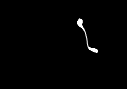

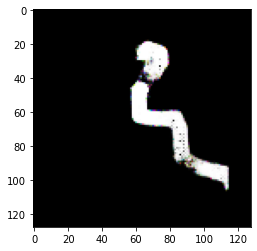

276
276


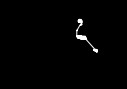

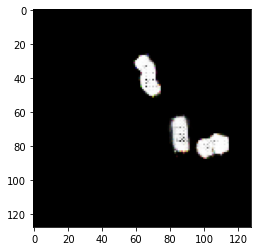

63
63


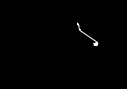

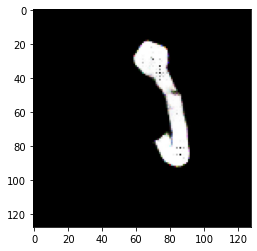

211
211


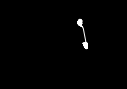

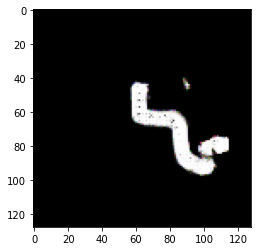

172
172


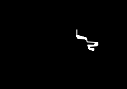

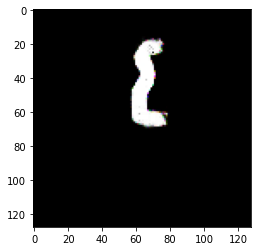

113
113


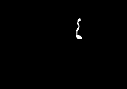

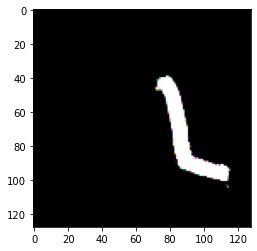

189
189


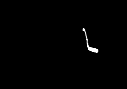

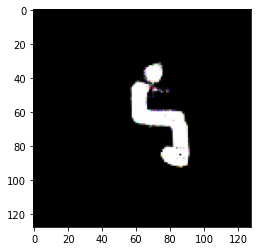

235
235


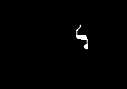

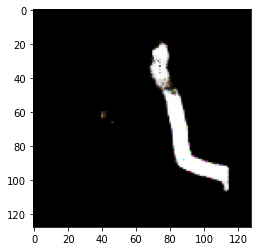

140
140


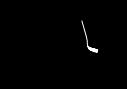

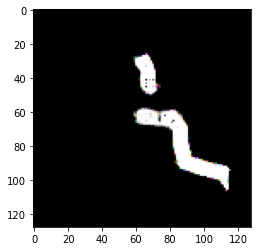

236
236


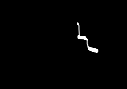

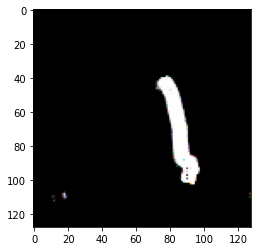

44
44


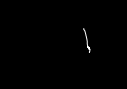

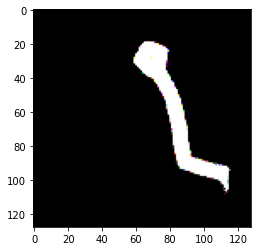

366
366


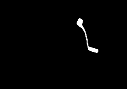

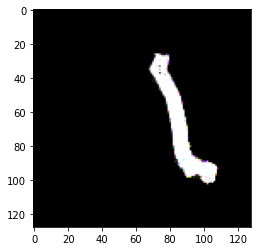

143
143


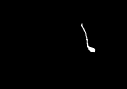

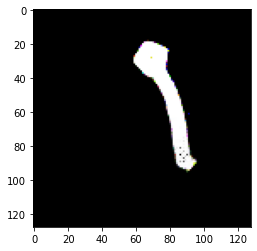

203
203


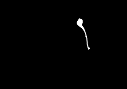

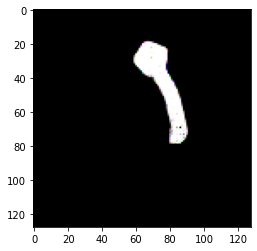

163
163


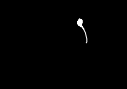

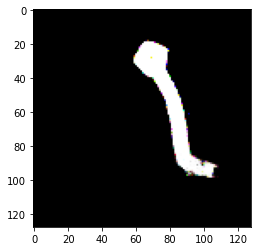

256
256


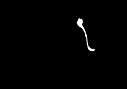

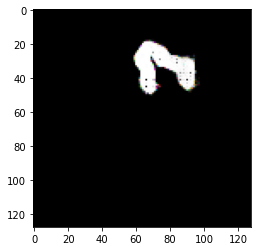

141
141


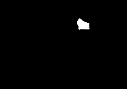

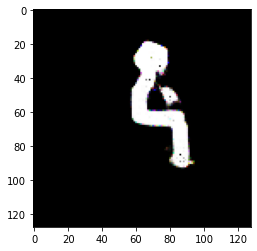

308
308


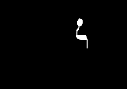

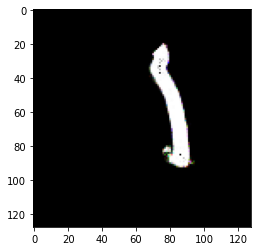

47
47


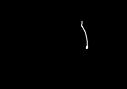

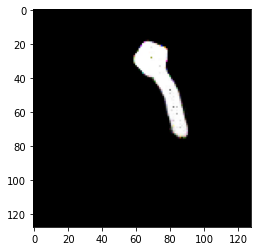

159
159


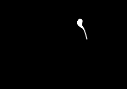

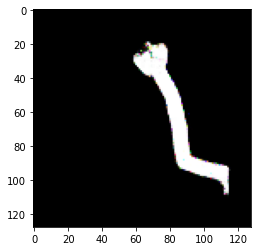

230
230


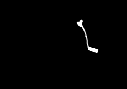

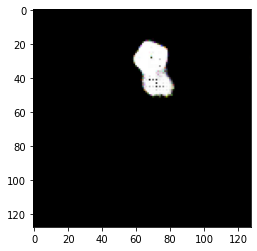

151
151


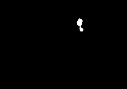

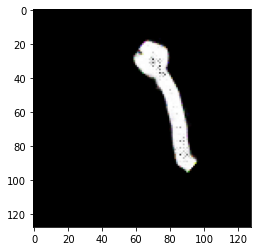

128
128


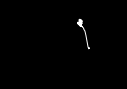

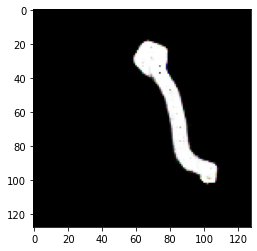

187
187


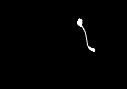

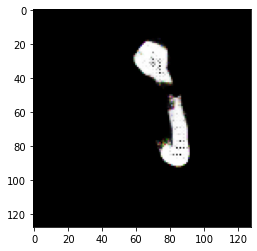

168
168


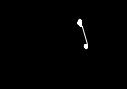

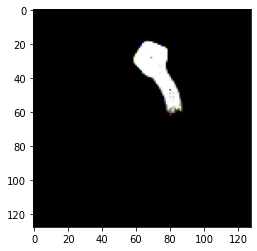

171
171


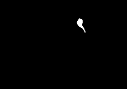

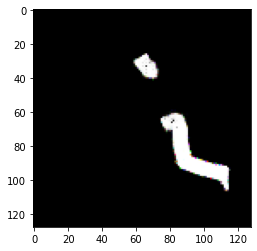

187
187


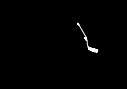

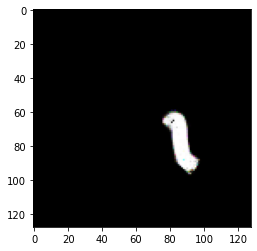

21
21


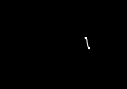

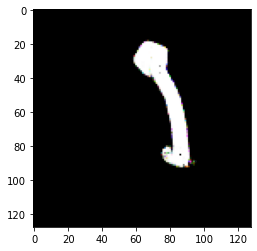

204
204


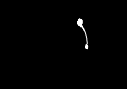

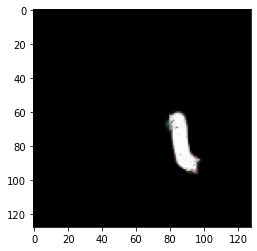

9
9


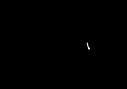

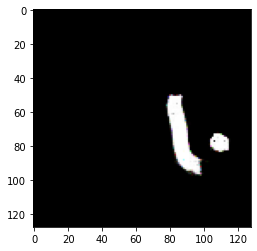

44
44


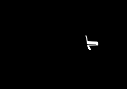

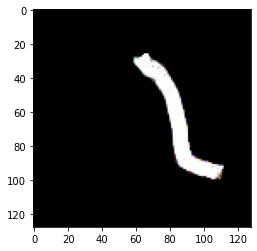

174
174


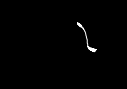

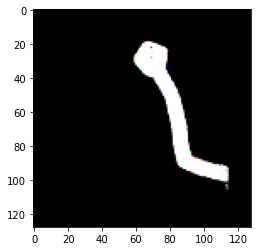

303
303


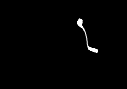

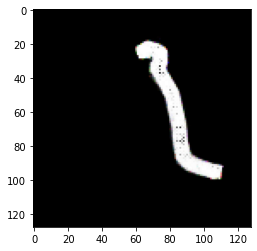

121
121


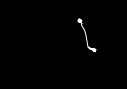

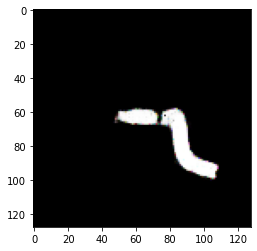

141
141


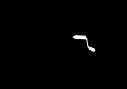

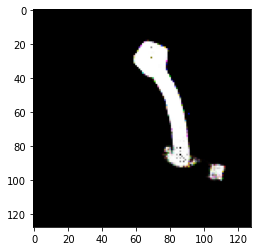

210
210


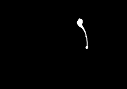

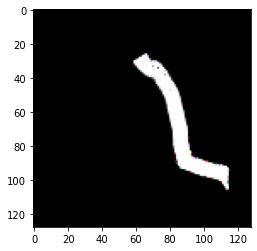

219
219


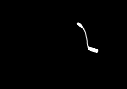

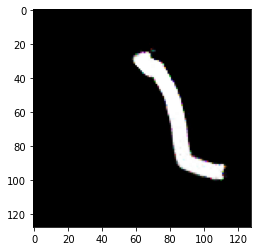

170
170


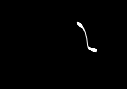

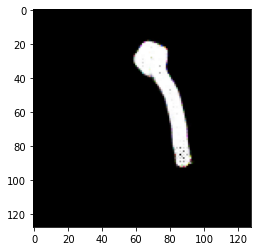

134
134


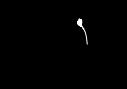

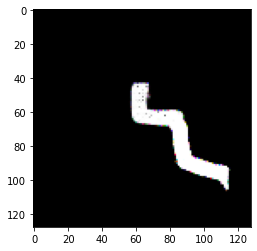

317
317


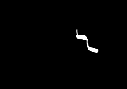

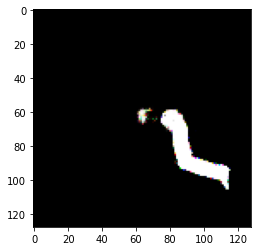

204
204


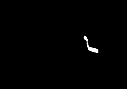

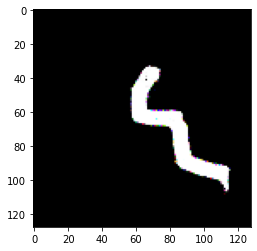

365
365


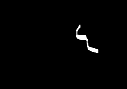

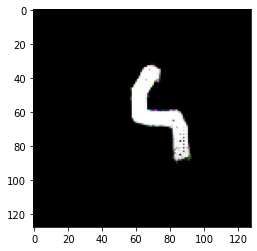

189
189


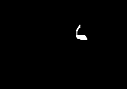

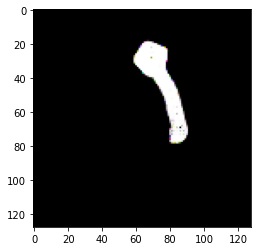

181
181


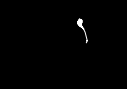

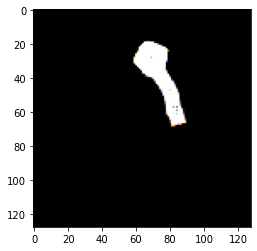

189
189


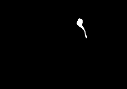

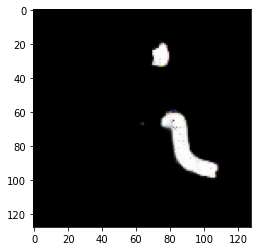

54
54


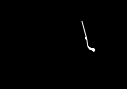

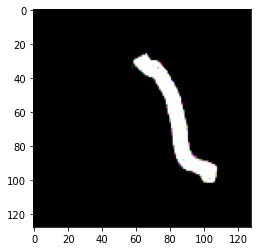

173
173


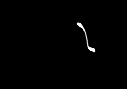

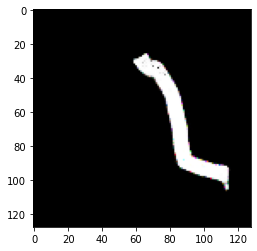

214
214


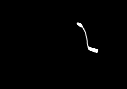

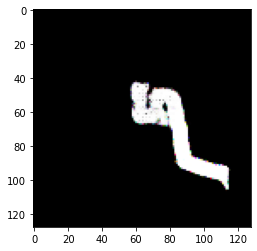

277
277


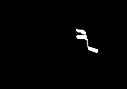

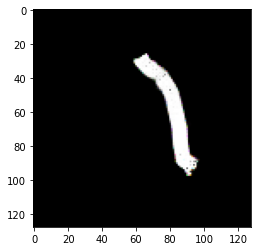

67
67


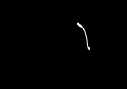

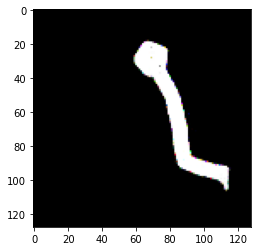

320
320


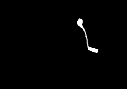

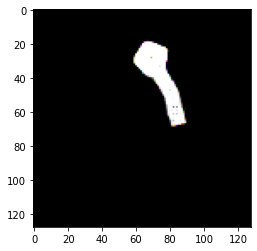

172
172


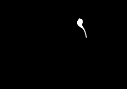

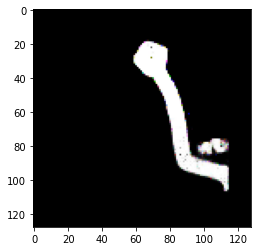

266
266


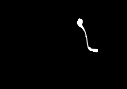

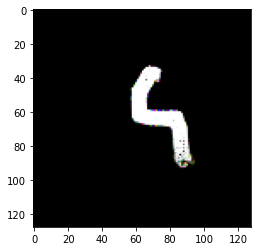

202
202


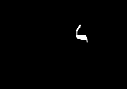

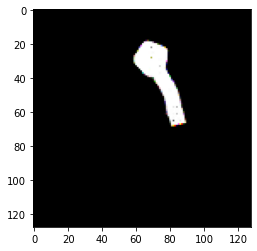

169
169


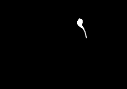

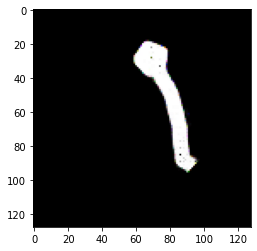

159
159


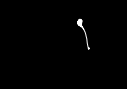

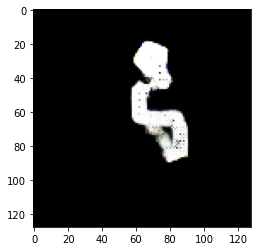

298
298


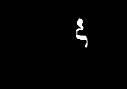

In [101]:
for i in range(100):
    filename="Images/test_arange_"+str(i)+".png"
    final_values,height,width=imageLoad(filename)
    lat,long=get_coordinates(final_values,height,width)
    dt = datetime.now()
    ts = datetime.timestamp(dt)
    times=[]
    times.append(int(ts))
    times=times*len(lat)
    final_data = {'timestamp':times,'latitude': long, 'longitude': lat}
    dataframe = pd.DataFrame(final_data)
    name="testCSV/"+str(i)+"_test_gps.csv"
    dataframe.to_csv(name,header=False)
    draw_image(lat,long)